# Import Used Modules

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

print("Imported modules.")

Imported modules.


# Import Dataframe

In [3]:
train_df = pd.read_csv("train_images_features.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the examples
test_df = pd.read_csv("test_images_features.csv")

In [4]:
display(train_df.head())
display(test_df.head())

,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label
433,133,./dataset/foggy/foggy16.jpg,133.542199,125.497312,119.510716,0.238261,439.425723,0.000259,0.253507,foggy
118,118,./dataset/cloudy/cloudy18.jpg,119.124494,125.100528,132.871432,0.142987,7.347887,0.001703,0.626224,cloudy
1164,14,./dataset/sunrise/sunrise265.jpg,103.592768,72.881578,26.887916,0.753982,11.851490,0.002306,0.563971,sunrise
819,219,./dataset/rainy/rain67.jpg,49.299053,74.302596,84.152962,0.452036,38.546264,0.000768,0.338270,rainy
260,260,./dataset/cloudy/cloudy295.jpg,110.631169,117.937555,126.946619,0.178174,69.415296,0.000690,0.352108,cloudy


,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label
0,0,./dataset/alien_test/rain_1.jpg,89.380456,108.331348,92.704043,0.340140,104.245269,0.001284,0.284216,rainy
1,1,./dataset/alien_test/shine_1.jpg,84.179988,145.610668,202.758774,0.650524,25.325296,0.003029,0.637173,shine
2,2,./dataset/alien_test/foggy_5.jpg,111.901819,122.010252,123.489308,0.122873,11.677350,0.002500,0.705304,foggy
3,3,./dataset/alien_test/Cloud_4.jpg,88.340293,151.776627,193.868678,0.557622,17.755358,0.002650,0.506353,cloudy
4,4,./dataset/alien_test/foggy_7.jpg,122.728178,73.513052,36.486659,0.714519,8.337532,0.003289,0.732819,foggy


# Convert Numeric Values to Their Z-Scores

In [5]:
#@title Convert raw values to their Z-scores 

numeric_columns = ["avg_r", "avg_g", "avg_b", "contrast", "ASM", "homogeneity"]

for col in numeric_columns:
    # Calculate the Z-scores of each column in the training set:
    train_df_mean = train_df[col].mean()
    train_df_std = train_df[col].std()
    train_df[col] = (train_df[col] - train_df_mean)/train_df_std

    # Calculate the Z-scores of each column in the test set.
    test_df[col] = (test_df[col] - train_df_mean)/train_df_std

print("Normalized the values.")

Normalized the values.


In [6]:
display(train_df.head())
display(test_df.head())

,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label
433,133,./dataset/foggy/foggy16.jpg,0.424440,0.205914,0.075944,0.238261,1.654876,-0.264480,-1.110720,foggy
118,118,./dataset/cloudy/cloudy18.jpg,0.009686,0.195453,0.332458,0.142987,-0.551254,-0.180706,0.845894,cloudy
1164,14,./dataset/sunrise/sunrise265.jpg,-0.437116,-1.181374,-1.702330,0.753982,-0.528259,-0.145739,0.519089,sunrise
819,219,./dataset/rainy/rain67.jpg,-1.998985,-1.143907,-0.602893,0.452036,-0.391959,-0.234940,-0.665750,rainy
260,260,./dataset/cloudy/cloudy295.jpg,-0.234642,0.006591,0.218707,0.178174,-0.234346,-0.239484,-0.593105,cloudy


,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label
0,0,./dataset/alien_test/rain_1.jpg,-0.845962,-0.246691,-0.438720,0.340140,-0.056509,-0.205015,-0.949509,rainy
1,1,./dataset/alien_test/shine_1.jpg,-0.995564,0.736231,1.674231,0.650524,-0.459464,-0.103800,0.903370,shine
2,2,./dataset/alien_test/foggy_5.jpg,-0.198089,0.113973,0.152329,0.122873,-0.529148,-0.134466,1.261028,foggy
3,3,./dataset/alien_test/Cloud_4.jpg,-0.875884,0.898806,1.503549,0.557622,-0.498115,-0.125769,0.216616,cloudy
4,4,./dataset/alien_test/foggy_7.jpg,0.113353,-1.164724,-1.518043,0.714519,-0.546201,-0.088691,1.405474,foggy


# Display Attribute Correlation

In [7]:
display(train_df.corr())

,id,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity
id,1.000000,-0.010898,-0.114900,-0.137644,0.063076,-0.022180,0.025727,0.029405
avg_r,-0.010898,1.000000,0.635598,0.270568,-0.050624,-0.049262,-0.069407,0.062067
avg_g,-0.114900,0.635598,1.000000,0.874212,-0.324659,0.023166,-0.114200,-0.092685
avg_b,-0.137644,0.270568,0.874212,1.000000,-0.406487,0.024810,-0.099306,-0.097692
avg_s,0.063076,-0.050624,-0.324659,-0.406487,1.000000,-0.094517,-0.027932,0.148109
contrast,-0.022180,-0.049262,0.023166,0.024810,-0.094517,1.000000,-0.095333,-0.578588
ASM,0.025727,-0.069407,-0.114200,-0.099306,-0.027932,-0.095333,1.000000,0.305109
homogeneity,0.029405,0.062067,-0.092685,-0.097692,0.148109,-0.578588,0.305109,1.000000


# Define Feature Layer

In [8]:
input_columns = ["avg_r", "avg_g", "avg_b", "avg_s", "contrast", "ASM", "homogeneity"]

feature_columns = []
for col in input_columns:
    feature_columns.append(
        tf.feature_column.numeric_column(col)
    )
    
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Define Function to Plot

In [9]:
#@title Define the plotting function.

def plot_the_scc_curve(epochs, scc, acc, val_acc):
    """Plot a curve of SCC vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Sparse Categorical Crossentropy")

    plt.plot(epochs, scc, label="loss")
    plt.legend()
    plt.ylim([scc.min()*0.95, scc.max() * 1.03])
    plt.show()
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.plot(epochs, acc, label="acc")
    plt.plot(epochs, val_acc, label="val acc")
    plt.legend()
    plt.ylim([0, 1])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


# Define Function to Create, Train, and Test Model

In [10]:
#@title Define functions to create and train a linear regression model
def create_model(my_learning_rate, feature_layer):
    """Create and compile a multiclass classification neural network."""
    model = tf.keras.models.Sequential()

    # Add the layer containing the feature columns to the model.
    model.add(feature_layer)
    
    # Add hidden layer 1
    model.add(tf.keras.layers.Dense(units=7, activation='relu'))
    
    # Add hidden layer 2
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))

    # Classification layer
    model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

    return model           


def train_model(model, x_train, y_train, x_val, y_val, epochs,
                batch_size=None):
    """Train the model by feeding it data."""

    x_train = {name:np.array(value) for name, value in x_train.items()}
    y_train = y_train.values
    
    x_val = {name:np.array(value) for name, value in x_val.items()}
    y_val = y_val.values
    
    history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                       validation_data=(x_val, y_val))

    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

def predict(model, x_test):
    x_test = {name:np.array(value) for name, value in x_test.items()}
    
    return model.predict(x_test)

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


# Encode Label to Numeric Values

In [11]:
# Create label encoder for "type_label"
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(train_df["type_label"].values)

LabelEncoder()

In [12]:
train_df["type_label_encoded"] = enc.transform(train_df["type_label"].values)
display(train_df.head())

,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label,type_label_encoded
433,133,./dataset/foggy/foggy16.jpg,0.424440,0.205914,0.075944,0.238261,1.654876,-0.264480,-1.110720,foggy,1
118,118,./dataset/cloudy/cloudy18.jpg,0.009686,0.195453,0.332458,0.142987,-0.551254,-0.180706,0.845894,cloudy,0
1164,14,./dataset/sunrise/sunrise265.jpg,-0.437116,-1.181374,-1.702330,0.753982,-0.528259,-0.145739,0.519089,sunrise,4
819,219,./dataset/rainy/rain67.jpg,-1.998985,-1.143907,-0.602893,0.452036,-0.391959,-0.234940,-0.665750,rainy,2
260,260,./dataset/cloudy/cloudy295.jpg,-0.234642,0.006591,0.218707,0.178174,-0.234346,-0.239484,-0.593105,cloudy,0


# Split train : validation = 0.7 : 0.3

In [13]:
# Split train dataset into train and validation
train_set = train_df.sample(frac=0.7)
val_set = train_df.drop(train_set.index)

display(train_set.head())
display(val_set.head())

,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label,type_label_encoded
318,18,./dataset/foggy/foggy203.jpeg,0.885142,-0.180857,-1.402637,0.777857,-0.574699,-0.086508,2.059582,foggy,1
922,22,./dataset/shine/shine123.jpg,-0.014989,0.725702,1.300468,0.384111,-0.421093,-0.180811,0.309604,shine,3
402,102,./dataset/foggy/foggy296.jpg,1.118350,1.003293,0.643415,0.065062,0.199370,0.707301,-0.241864,foggy,1
50,50,./dataset/cloudy/cloudy124.jpg,-0.892185,0.216132,0.950410,0.472230,-0.497410,-0.200720,-0.306301,cloudy,0
490,190,./dataset/foggy/foggy290.jpg,0.122061,0.160873,0.209122,0.058669,-0.534326,-0.133793,0.626999,foggy,1


,id,img_path,avg_r,avg_g,avg_b,avg_s,contrast,ASM,homogeneity,type_label,type_label_encoded
118,118,./dataset/cloudy/cloudy18.jpg,0.009686,0.195453,0.332458,0.142987,-0.551254,-0.180706,0.845894,cloudy,0
819,219,./dataset/rainy/rain67.jpg,-1.998985,-1.143907,-0.602893,0.452036,-0.391959,-0.234940,-0.665750,rainy,2
22,22,./dataset/cloudy/cloudy67.jpg,-1.432441,-1.283895,-0.893946,0.000000,-0.536464,-0.100732,0.763811,cloudy,0
1323,173,./dataset/sunrise/sunrise104.jpg,-0.084941,-1.186933,-0.419711,0.324487,-0.561352,0.563687,1.429406,sunrise,4
1147,247,./dataset/shine/shine30.jpg,0.079416,0.930357,1.635818,0.411460,-0.561104,-0.133272,1.030981,shine,3


# Train The Model

Train on 1050 samples, validate on 450 samples
Epoch 1/600
1050/1050 [==============================] - 1s 686us/sample - loss: 1.6595 - accuracy: 0.2800 - val_loss: 1.6179 - val_accuracy: 0.3111
Epoch 2/600
1050/1050 [==============================] - 0s 146us/sample - loss: 1.5741 - accuracy: 0.3438 - val_loss: 1.5525 - val_accuracy: 0.3622
Epoch 3/600
1050/1050 [==============================] - 0s 110us/sample - loss: 1.5177 - accuracy: 0.4076 - val_loss: 1.5012 - val_accuracy: 0.4156
Epoch 4/600
1050/1050 [==============================] - 0s 113us/sample - loss: 1.4596 - accuracy: 0.4581 - val_loss: 1.4449 - val_accuracy: 0.4378
Epoch 5/600
1050/1050 [==============================] - 0s 120us/sample - loss: 1.3865 - accuracy: 0.4962 - val_loss: 1.3618 - val_accuracy: 0.4911
Epoch 6/600
1050/1050 [==============================] - 0s 131us/sample - loss: 1.2910 - accuracy: 0.5733 - val_loss: 1.2496 - val_accuracy: 0.5644
Epoch 7/600
1050/1050 [==============================] - 0s

1050/1050 [==============================] - 0s 206us/sample - loss: 0.6099 - accuracy: 0.7676 - val_loss: 0.7163 - val_accuracy: 0.7356
Epoch 56/600
1050/1050 [==============================] - 0s 252us/sample - loss: 0.6072 - accuracy: 0.7724 - val_loss: 0.7123 - val_accuracy: 0.7333
Epoch 57/600
1050/1050 [==============================] - 0s 253us/sample - loss: 0.6067 - accuracy: 0.7695 - val_loss: 0.7130 - val_accuracy: 0.7378
Epoch 58/600
1050/1050 [==============================] - 0s 213us/sample - loss: 0.6041 - accuracy: 0.7695 - val_loss: 0.7131 - val_accuracy: 0.7333
Epoch 59/600
1050/1050 [==============================] - 0s 209us/sample - loss: 0.6044 - accuracy: 0.7705 - val_loss: 0.7139 - val_accuracy: 0.7356
Epoch 60/600
1050/1050 [==============================] - 0s 343us/sample - loss: 0.6025 - accuracy: 0.7752 - val_loss: 0.7098 - val_accuracy: 0.7378
Epoch 61/600
1050/1050 [==============================] - 0s 253us/sample - loss: 0.6016 - accuracy: 0.7733 - val

1050/1050 [==============================] - 0s 314us/sample - loss: 0.5634 - accuracy: 0.7876 - val_loss: 0.6794 - val_accuracy: 0.7533
Epoch 110/600
1050/1050 [==============================] - 0s 310us/sample - loss: 0.5644 - accuracy: 0.7895 - val_loss: 0.6848 - val_accuracy: 0.7444
Epoch 111/600
1050/1050 [==============================] - 0s 318us/sample - loss: 0.5623 - accuracy: 0.7924 - val_loss: 0.6800 - val_accuracy: 0.7444
Epoch 112/600
1050/1050 [==============================] - 0s 369us/sample - loss: 0.5623 - accuracy: 0.7876 - val_loss: 0.6824 - val_accuracy: 0.7422
Epoch 113/600
1050/1050 [==============================] - 0s 344us/sample - loss: 0.5636 - accuracy: 0.7857 - val_loss: 0.6794 - val_accuracy: 0.7467
Epoch 114/600
1050/1050 [==============================] - 0s 317us/sample - loss: 0.5610 - accuracy: 0.7924 - val_loss: 0.6764 - val_accuracy: 0.7511
Epoch 115/600
1050/1050 [==============================] - 0s 334us/sample - loss: 0.5625 - accuracy: 0.7857

1050/1050 [==============================] - 0s 449us/sample - loss: 0.5422 - accuracy: 0.7933 - val_loss: 0.6768 - val_accuracy: 0.7511
Epoch 164/600
1050/1050 [==============================] - 0s 340us/sample - loss: 0.5422 - accuracy: 0.7962 - val_loss: 0.6758 - val_accuracy: 0.7511
Epoch 165/600
1050/1050 [==============================] - 0s 309us/sample - loss: 0.5422 - accuracy: 0.7952 - val_loss: 0.6762 - val_accuracy: 0.7511
Epoch 166/600
1050/1050 [==============================] - 0s 247us/sample - loss: 0.5391 - accuracy: 0.7971 - val_loss: 0.6747 - val_accuracy: 0.7444
Epoch 167/600
1050/1050 [==============================] - 0s 419us/sample - loss: 0.5407 - accuracy: 0.7981 - val_loss: 0.6722 - val_accuracy: 0.7533
Epoch 168/600
1050/1050 [==============================] - 0s 309us/sample - loss: 0.5394 - accuracy: 0.7943 - val_loss: 0.6710 - val_accuracy: 0.7533
Epoch 169/600
1050/1050 [==============================] - 0s 407us/sample - loss: 0.5402 - accuracy: 0.7933

1050/1050 [==============================] - 0s 293us/sample - loss: 0.5325 - accuracy: 0.7952 - val_loss: 0.6685 - val_accuracy: 0.7467
Epoch 218/600
1050/1050 [==============================] - 0s 345us/sample - loss: 0.5318 - accuracy: 0.8000 - val_loss: 0.6659 - val_accuracy: 0.7378
Epoch 219/600
1050/1050 [==============================] - 0s 305us/sample - loss: 0.5323 - accuracy: 0.8000 - val_loss: 0.6662 - val_accuracy: 0.7422
Epoch 220/600
1050/1050 [==============================] - 0s 244us/sample - loss: 0.5297 - accuracy: 0.8010 - val_loss: 0.6664 - val_accuracy: 0.7400
Epoch 221/600
1050/1050 [==============================] - 0s 275us/sample - loss: 0.5325 - accuracy: 0.7990 - val_loss: 0.6623 - val_accuracy: 0.7467
Epoch 222/600
1050/1050 [==============================] - 0s 318us/sample - loss: 0.5374 - accuracy: 0.7943 - val_loss: 0.6675 - val_accuracy: 0.7444
Epoch 223/600
1050/1050 [==============================] - 0s 232us/sample - loss: 0.5304 - accuracy: 0.8057

1050/1050 [==============================] - 0s 346us/sample - loss: 0.5263 - accuracy: 0.7990 - val_loss: 0.6624 - val_accuracy: 0.7378
Epoch 272/600
1050/1050 [==============================] - 0s 286us/sample - loss: 0.5253 - accuracy: 0.8010 - val_loss: 0.6616 - val_accuracy: 0.7378
Epoch 273/600
1050/1050 [==============================] - 0s 271us/sample - loss: 0.5265 - accuracy: 0.7990 - val_loss: 0.6626 - val_accuracy: 0.7356
Epoch 274/600
1050/1050 [==============================] - 0s 245us/sample - loss: 0.5258 - accuracy: 0.8048 - val_loss: 0.6631 - val_accuracy: 0.7378
Epoch 275/600
1050/1050 [==============================] - 0s 276us/sample - loss: 0.5266 - accuracy: 0.7981 - val_loss: 0.6623 - val_accuracy: 0.7333
Epoch 276/600
1050/1050 [==============================] - 0s 230us/sample - loss: 0.5269 - accuracy: 0.8019 - val_loss: 0.6637 - val_accuracy: 0.7356
Epoch 277/600
1050/1050 [==============================] - 0s 235us/sample - loss: 0.5264 - accuracy: 0.8000

1050/1050 [==============================] - 0s 282us/sample - loss: 0.5230 - accuracy: 0.8019 - val_loss: 0.6637 - val_accuracy: 0.7400
Epoch 326/600
1050/1050 [==============================] - 0s 297us/sample - loss: 0.5259 - accuracy: 0.7981 - val_loss: 0.6579 - val_accuracy: 0.7422
Epoch 327/600
1050/1050 [==============================] - 0s 253us/sample - loss: 0.5225 - accuracy: 0.8029 - val_loss: 0.6662 - val_accuracy: 0.7378
Epoch 328/600
1050/1050 [==============================] - 0s 275us/sample - loss: 0.5217 - accuracy: 0.8029 - val_loss: 0.6571 - val_accuracy: 0.7400
Epoch 329/600
1050/1050 [==============================] - 0s 227us/sample - loss: 0.5224 - accuracy: 0.7990 - val_loss: 0.6604 - val_accuracy: 0.7422
Epoch 330/600
1050/1050 [==============================] - 0s 259us/sample - loss: 0.5226 - accuracy: 0.8010 - val_loss: 0.6583 - val_accuracy: 0.7422
Epoch 331/600
1050/1050 [==============================] - 0s 281us/sample - loss: 0.5234 - accuracy: 0.8000

1050/1050 [==============================] - 0s 316us/sample - loss: 0.5201 - accuracy: 0.8029 - val_loss: 0.6536 - val_accuracy: 0.7467
Epoch 380/600
1050/1050 [==============================] - 0s 236us/sample - loss: 0.5199 - accuracy: 0.8000 - val_loss: 0.6552 - val_accuracy: 0.7444
Epoch 381/600
1050/1050 [==============================] - 0s 247us/sample - loss: 0.5223 - accuracy: 0.8010 - val_loss: 0.6575 - val_accuracy: 0.7400
Epoch 382/600
1050/1050 [==============================] - 0s 209us/sample - loss: 0.5233 - accuracy: 0.8000 - val_loss: 0.6556 - val_accuracy: 0.7422
Epoch 383/600
1050/1050 [==============================] - 0s 256us/sample - loss: 0.5179 - accuracy: 0.8048 - val_loss: 0.6558 - val_accuracy: 0.7444
Epoch 384/600
1050/1050 [==============================] - 0s 223us/sample - loss: 0.5189 - accuracy: 0.8019 - val_loss: 0.6551 - val_accuracy: 0.7422
Epoch 385/600
1050/1050 [==============================] - 0s 221us/sample - loss: 0.5207 - accuracy: 0.8038

1050/1050 [==============================] - 0s 267us/sample - loss: 0.5160 - accuracy: 0.8038 - val_loss: 0.6524 - val_accuracy: 0.7444
Epoch 434/600
1050/1050 [==============================] - 0s 273us/sample - loss: 0.5183 - accuracy: 0.8019 - val_loss: 0.6515 - val_accuracy: 0.7644
Epoch 435/600
1050/1050 [==============================] - 0s 232us/sample - loss: 0.5173 - accuracy: 0.8019 - val_loss: 0.6538 - val_accuracy: 0.7378
Epoch 436/600
1050/1050 [==============================] - 0s 236us/sample - loss: 0.5236 - accuracy: 0.7933 - val_loss: 0.6483 - val_accuracy: 0.7556
Epoch 437/600
1050/1050 [==============================] - 0s 265us/sample - loss: 0.5211 - accuracy: 0.7981 - val_loss: 0.6529 - val_accuracy: 0.7444
Epoch 438/600
1050/1050 [==============================] - 0s 294us/sample - loss: 0.5206 - accuracy: 0.7990 - val_loss: 0.6504 - val_accuracy: 0.7556
Epoch 439/600
1050/1050 [==============================] - 0s 256us/sample - loss: 0.5172 - accuracy: 0.8000

1050/1050 [==============================] - 0s 300us/sample - loss: 0.5144 - accuracy: 0.8019 - val_loss: 0.6471 - val_accuracy: 0.7511
Epoch 488/600
1050/1050 [==============================] - 0s 275us/sample - loss: 0.5152 - accuracy: 0.8019 - val_loss: 0.6418 - val_accuracy: 0.7556
Epoch 489/600
1050/1050 [==============================] - 0s 345us/sample - loss: 0.5157 - accuracy: 0.8010 - val_loss: 0.6480 - val_accuracy: 0.7533
Epoch 490/600
1050/1050 [==============================] - 0s 320us/sample - loss: 0.5168 - accuracy: 0.8048 - val_loss: 0.6413 - val_accuracy: 0.7644
Epoch 491/600
1050/1050 [==============================] - 0s 281us/sample - loss: 0.5152 - accuracy: 0.8029 - val_loss: 0.6422 - val_accuracy: 0.7556
Epoch 492/600
1050/1050 [==============================] - 0s 329us/sample - loss: 0.5131 - accuracy: 0.8029 - val_loss: 0.6456 - val_accuracy: 0.7444
Epoch 493/600
1050/1050 [==============================] - 0s 303us/sample - loss: 0.5139 - accuracy: 0.8019

1050/1050 [==============================] - 0s 243us/sample - loss: 0.5112 - accuracy: 0.8029 - val_loss: 0.6348 - val_accuracy: 0.7600
Epoch 542/600
1050/1050 [==============================] - 0s 236us/sample - loss: 0.5128 - accuracy: 0.8038 - val_loss: 0.6391 - val_accuracy: 0.7600
Epoch 543/600
1050/1050 [==============================] - 0s 200us/sample - loss: 0.5121 - accuracy: 0.8019 - val_loss: 0.6350 - val_accuracy: 0.7622
Epoch 544/600
1050/1050 [==============================] - 0s 261us/sample - loss: 0.5147 - accuracy: 0.8076 - val_loss: 0.6397 - val_accuracy: 0.7644
Epoch 545/600
1050/1050 [==============================] - 0s 296us/sample - loss: 0.5141 - accuracy: 0.8038 - val_loss: 0.6379 - val_accuracy: 0.7511
Epoch 546/600
1050/1050 [==============================] - 0s 231us/sample - loss: 0.5124 - accuracy: 0.8019 - val_loss: 0.6376 - val_accuracy: 0.7622
Epoch 547/600
1050/1050 [==============================] - 0s 253us/sample - loss: 0.5099 - accuracy: 0.8029

1050/1050 [==============================] - 0s 278us/sample - loss: 0.5137 - accuracy: 0.8057 - val_loss: 0.6384 - val_accuracy: 0.7600
Epoch 596/600
1050/1050 [==============================] - 0s 192us/sample - loss: 0.5097 - accuracy: 0.8067 - val_loss: 0.6368 - val_accuracy: 0.7556
Epoch 597/600
1050/1050 [==============================] - 0s 254us/sample - loss: 0.5094 - accuracy: 0.8086 - val_loss: 0.6342 - val_accuracy: 0.7756
Epoch 598/600
1050/1050 [==============================] - 0s 255us/sample - loss: 0.5098 - accuracy: 0.8057 - val_loss: 0.6402 - val_accuracy: 0.7644
Epoch 599/600
1050/1050 [==============================] - 0s 215us/sample - loss: 0.5108 - accuracy: 0.8057 - val_loss: 0.6323 - val_accuracy: 0.7711
Epoch 600/600
1050/1050 [==============================] - 0s 209us/sample - loss: 0.5114 - accuracy: 0.8048 - val_loss: 0.6423 - val_accuracy: 0.7511


,loss,accuracy,val_loss,val_accuracy
0,1.659456,0.280000,1.617948,0.311111
1,1.574141,0.343810,1.552468,0.362222
2,1.517697,0.407619,1.501152,0.415556
3,1.459614,0.458095,1.444891,0.437778
4,1.386524,0.496190,1.361843,0.491111
...,...,...,...,...
595,0.509663,0.806667,0.636793,0.755556
596,0.509438,0.808571,0.634155,0.775556
597,0.509794,0.805714,0.640250,0.764444
598,0.510807,0.805714,0.632274,0.771111


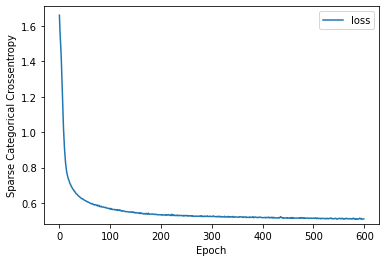

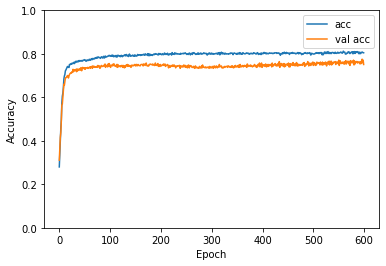

In [14]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 600
batch_size = round(train_df.shape[0] * 0.05)
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer)

x_train = train_set
y_train = train_set["type_label_encoded"]
x_val = val_set
y_val = val_set["type_label_encoded"]

epochs, hist = train_model(my_model, x_train, y_train, x_val, y_val, 
                           epochs, batch_size)

# Plot a graph of the metric vs. Sparse Categorical Crossentropy
display(hist)
plot_the_scc_curve(epochs, hist["loss"], hist["accuracy"], hist["val_accuracy"])

# Test The Model Using Test Dataframe

In [15]:
import numpy as np

test_df["type_label_encoded"] = enc.transform(test_df["type_label"].values)
y_pred = predict(my_model, test_df)
y_pred = [np.argmax(pred) for pred in y_pred]

y_pred = enc.inverse_transform(y_pred)

comparison = pd.DataFrame(columns = ["img_path", "actual_label", "predicted_label"])
comparison["img_path"] = test_df["img_path"]
comparison["actual_label"] = test_df["type_label"]
comparison["predicted_label"] = y_pred

display(comparison)

,img_path,actual_label,predicted_label
0,./dataset/alien_test/rain_1.jpg,rainy,rainy
1,./dataset/alien_test/shine_1.jpg,shine,shine
2,./dataset/alien_test/foggy_5.jpg,foggy,cloudy
3,./dataset/alien_test/Cloud_4.jpg,cloudy,shine
4,./dataset/alien_test/foggy_7.jpg,foggy,sunrise
5,./dataset/alien_test/sunrise_5.jpg,sunrise,sunrise
6,./dataset/alien_test/foggy_3.jpg,foggy,sunrise
7,./dataset/alien_test/shine_3.jpg,shine,shine
8,./dataset/alien_test/foggy_10.jpg,foggy,foggy
9,./dataset/alien_test/foggy_1.jpg,foggy,cloudy


# Report The Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(test_df["type_label"].values, y_pred)))

print("Classification Report:")
print(classification_report(test_df["type_label"].values, y_pred))

Confusion Matrix:


,0,1,2,3,4
0,2,0,0,2,0
1,4,4,0,0,2
2,0,0,6,0,0
3,0,0,0,3,0
4,0,0,0,0,7


Classification Report:
              precision    recall  f1-score   support

      cloudy       0.33      0.50      0.40         4
       foggy       1.00      0.40      0.57        10
       rainy       1.00      1.00      1.00         6
       shine       0.60      1.00      0.75         3
     sunrise       0.78      1.00      0.88         7

    accuracy                           0.73        30
   macro avg       0.74      0.78      0.72        30
weighted avg       0.82      0.73      0.72        30

